# Better understanding of Elyzee communities
In the [elyzeeTopicModeling.ipynb](https://luzine.lumenai.fr/notebooks/JesseDingley/elyzeeTopicModeling.ipynb) notebook, we saw how to perform topic modeling on the elyzee communities. But we didn't really dig further than that. In this notebook, we're going to try and find out more precisely what each community talks about. 

Let's explain a little further. If we calculate the topic distributions for each community and stop there, it's not actually that interesting. A lot of communities will share the same topics and it's hard to tell them apart. That is what this notebook is focused on: differentiating the communities. For this: 

***

  ## <b>1.</b> <a href="#1">Construct a general topic model covering the entire dataset</a>
 
 ## <b>2.</b> <a href="#2">Get the topic distributions for the communities</a>
 
 ## <b>3.</b> <a href="#3">Identify and filter out common topics within communities</a>
 
 ## <b>4.</b> <a href="#4">Compare communities</a>
 
 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.1.</b>  <a href="#4-1">Find the most prominent communities for a given topic</a>
 
 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.2.</b> <a href="#4-2"> Find communities greatly dependant on one specific topic</a>
 
 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.3.</b> <a href="#4-3"> Create clusters of similar communities</a>
 

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.3.1.</b> <a href="#4-3-1">PCA</a><b>
    
 <b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.3.2.</b> <a href="#4-3-2">Manual Clustering</a><b>
    
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.3.3.</b> <a href="#4-3-3">Automatic Clustering</a><b>
 
 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.4.</b> <a href="#4-4">Study each topic's entropy</a>

<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.4.1.</b> <a href="#4-4-1">Calculate intermediate probabilities</a><b>

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.4.2.</b> <a href="#4-4-2">Define $H$ and calculate $H$ for all topics</a><b>


<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.4.3.</b> <a href="#4-4-3">Analyes results</a><b>
    
 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.5.</b> <a href="#4-5">Study each community's entropy</a>

<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.5.1.</b> <a href="#4-5-1">Define $H$ and calculate $H$ for all communities</a><b>

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.5.2.</b> <a href="#4-5-2">Analyse results</a><b>


 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.6.</b> <a href="#4-6">Further analysis</a>
 
 <br>
 <b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.6.1.</b> <a href="#4-6-1">Analyse $P(T)$</a><b>

 <b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.6.2.</b> <a href="#4-6-2">Analyse topic distributions of high entropy communites</a><b>

 <b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>4.6.3.</b> <a href="#4-6-3">Analyse entropy of common topics</a><b>


 [comment]: <> (4. Find a community topic distribution that stands out from other communities. 5. Study the entropy of the communities to find out the ones that talk about the most topics. 6. Study the entropy of the topics to find out the ones that are the most widespread, or oppositely, the ones that aren't talked about often.)

# Notable variables

+ `newComsTopicDists` : 
    - Dictionary where keys are community ID's and values are lists of `(t,p)` where `t` is the topic and `p` is the probability of that topic in the community.
    - Each list is of length 90 (90 topics).
    - There are 249 keys (we filtered out the 'empty' communities, see <a href='#2-5'>2.5.</a>)
    - Example: `"b'-10000082547'bis": [(78, 0.14517416), (69, 0.13508898),...]`
    
<br>
+ `npNewComsTopicsDists` :
    - np.array of shape (249,90). Each sub-array is a topic distribution for a community. The first sub-array corresponds to the topic distribution of the first community ("b'-10000082547'bis").
    - Each sub-array is of length 90 (90 topics)
    - There are 249 sub-arrays (we filtered out the 'empty' communities, see <a href='#2-5'>2.5.</a>)
    - Example sub-array: `[4.8929457e-02, 2.9534600e-03, 1.1239481e-02, ..., 6.9558154e-10]`
     
<br>    
+ `comsNonCommonTopicDists` : 
    - Dictionary where keys are community ID's and values are lists of `(t,p)` where `t` is the topic and `p` is the probability of that topic in the community.
    - Each list is of length 79 (79 topics, we filterd out the common topics, see <a href='#3'>3.</a>)
    - There are 249 keys (we filtered out the 'empty' communities, see <a href='#2-5'>2.5.</a>)
    - Example element: `"b'-10000082547'bis": [(78, 0.14517416), (69, 0.13508898),...]`
    
<br>
+ `npComsNonCommonTopicDists` :
    - np.array of shape (249,79). Each sub-array is a topic distribution for a community. The first sub-array corresponds to the topic distribution of the first community ("b'-10000082547'bis").
    - Each sub-array is of length 79 (79 topics, we filterd out the common topics, see <a href='#3'>3.</a>)
    - There are 249 sub-arrays (we filtered out the 'empty' communities, see <a href='#2-5'>2.5.</a>)
    - Example sub-array: `[4.8929457e-02, 2.9534600e-03, 1.1239481e-02, ..., 6.9558154e-10]`


# Necessary libraries


In [1]:
import pandas as pd
import re
from rake_nltk import Rake
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
import plotly.graph_objects as go

import json
import pickle
import re

# removing stopwords from tweets
from gensim.parsing.preprocessing import preprocess_string, STOPWORDS
from stop_words import get_stop_words

# for comparing dates
from datetime import datetime

# gensim
from gensim import corpora, models, similarities
from gensim import models
import pyLDAvis
import pyLDAvis.gensim
from gensim.summarization import keywords

# parameter tuning
from gensim.models import CoherenceModel
from collections import defaultdict 
import numpy as np
import matplotlib.pyplot as plt

# word clouds
from wordcloud import WordCloud

# clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.stats import wasserstein_distance
from scipy.stats import entropy
from sklearn.manifold import TSNE
from math import log2
from math import log
import math
import itertools

# Import main notebook

In [2]:
from ipynb.fs.full.elyzeeTopicModeling import *

# 1. Make general topic model
<div id="1"></div>
The first step is to make a general topic model. See [parameterTuning.ipynb](https://luzine.lumenai.fr/notebooks/JesseDingley/parameterTuningLDA.ipynb) to see how we decided how to build our general topic model. To give a spoiler, our general topic model is a model where each document in the Document-Term matrix is a tweet. We consider all 900 000 tweets from the dataset. We set the hyper-parameters as following: 

   - `num_topics = 90`
   
   - `alpha = 0.000001`
   
   - `eta = 0.9`
   
   - `passes = 10`
   
   - `iterations = 200`

In [3]:
# genModel, genDictionary, genCorpus, allPreProcessedTweets = LDAModelForAllTweets(
#     numTopics=90,
#     passes=10,
#     iterations=200,
#     alpha=0.000001,
#     eta=0.9,
#     eval_every=10)

In [4]:
# %store genModel
# %store genDictionary
# %store genCorpus
# %store allPreProcessedTweets

In [5]:
%store -r genModel
%store -r genDictionary
%store -r genCorpus
%store -r allPreProcessedTweets

# 2. Get the topic distributions for the communities
<div id="2"></div>
Throuhout this notebook we shall work with a set of communities of a level of a a timestamp. In our case, we'll proceed with the following example:

 - timestamp: 'Mon Apr 24 19:34:10 +0000 2017'
 - level: 3 (the deepest level)
 
Why this timestamp? Because On april 13th 2017, the first round of the presidential election took place. Since it's the first round and not the second, more candidates are topical, meaning hopefully more diversity in the communities.

In [6]:
exampleTimeStamp = 'Mon Apr 24 19:34:10 +0000 2017'

In [7]:
# comsTopicDists = getCompactTopicDistForAllComs(model=genModel,
#                               timeStamp=exampleTimeStamp,
#                               level=3,
#                               minWeight=-1.0,
#                               dateMargin=20, 
#                               connectionsToo=False)

In [8]:
#%store comsTopicDists

In [9]:
%store -r comsTopicDists

In this next snippet of code we are filling in the gaps. Let's explain: when gensim calculates the topic distributions for each community, if a distribution is negligeable (~0), it isn't displayed. So for example if in community 5 topic 6 is at 0.0000006%, gensim will ignore this topic, so we append a distribution for topic 6 to the topic distribution of the community. This is how we do it:

We first sum the original topic distribution. The probability to fill in is defined as $\left| \frac{1-\text{sum}}{\text{nbIgnoredTopics}} \right|$. Absolute value because some initial distributions's sum's surpass 1 (only by an order of $10^{-9}$. We then find all the ignored topics and assign them this probability. Now all our distributions will sum to 1.

In [10]:
for com in comsTopicDists.keys():
    
    # summing the topic distribution of the community
    distSum = sum([b for (a,b) in comsTopicDists[com]])
    
    # calculating the distribution to fill in
    count = 0
    for nb in range(90):
        if not nb in [a for (a,b) in comsTopicDists[com]]:
            count += 1 # counting the gaps
    distToFillIn = np.float32(abs((1-distSum)/count))
    
    # appending the "forgotten" distributions
    for nb in range(90):
        if not nb in [a for (a,b) in comsTopicDists[com]]:
            comsTopicDists[com].append((nb, distToFillIn))

## 2.5 Filter out "empty" communities
<div id='2-5'></div>

We generated a general topic model with 90 topics. Although it is a good model (coherence score of 50), 90 topics might not be enough. Because of this, some communities don't cover any of the topics. As a result, each topic has the same distribution ($\frac{1}{90}$) in these particular communities. For now we'll put them aside to not disturb   

In [11]:
def removeEmptyComs(comsTopicDists):
    """
    remove empty communities
    
    :param comsTopicDists: topic distributions for all communities
    
    :type comsTopicDists: dict
    
    :return: dictionary (just like comsTopicDists)
    :rtype: dict
    """
    
    newComsTopicDists = {}
    
    for com in comsTopicDists.keys():
        topicDistSimple = [b for (a,b) in comsTopicDists[com]]
        elt = topicDistSimple[0] 
        check = True
        # Comparing each element with first item  
        for item in topicDistSimple: 
            if elt != item: 
                check = False
                break;
        if not check:
            newComsTopicDists[com] = comsTopicDists[com]
            
    return newComsTopicDists

In [12]:
newComsTopicDists = removeEmptyComs(comsTopicDists)

In [13]:
len(newComsTopicDists)/len(comsTopicDists)

0.7134670487106017

So for 90 topics, 71% of communities are not "empty".

# 3. Identify common topics within communities
<div id="3"></div>
The first real part of differentiating the communities is to identify common topics within communities and then filtering them out. We define a topic as common when all communities have the same probability for it. For example, topic 5 would be common if its probability in each community is 5%. In other words, the events $T_5 | C$ need to have equiprobability, where $C$ is the random variable modeling the possible communities. Then filtering these topics out of each distribution will allow us to see the unique probabilities in each community topic distribution.

In order to do this, we'll develop a function that will label the topics true or false. True if they are redundant (the same distribution appears in all communities), false if not. We'll also define a threshold to define equal distributions.

In [14]:
def findCommonTopics(comsTopicDists,threshold):
    """
    find common topics
    
    :param comsTopicDists: topic distributions for all communities
    :param threshold: max distance between two probabilites for them to be considered the same
    
    :type comsTopicDists: dict
    :type threshold: float
    
    :return: a list of (int,bool). len(list) = 90. Example elt: (34,True) (Topic 34 is present everwhere)
    :rtype: list
    """
    commonTopics = {}
    for topic in range(90):
        count = 0
        dist0 = [b for (a,b) in comsTopicDists[list(comsTopicDists.keys())[0]]  if a == topic][0]
        for com in comsTopicDists.keys():
            if abs(dist0-[b for (a,b) in comsTopicDists[com] if a == topic][0]) <= threshold:
                count += 1
        if count == len(list(comsTopicDists.keys())):
            commonTopics[topic] = True
        else:
            commonTopics[topic] = False
            
    return commonTopics

Let's take a 5% threshold. The common topics are the following:

In [15]:
labeledTopics = findCommonTopics(newComsTopicDists,0.05)

In [16]:
{k:v for (k,v) in labeledTopics.items() if v}

{0: True,
 3: True,
 15: True,
 20: True,
 28: True,
 46: True,
 53: True,
 57: True,
 67: True,
 76: True,
 85: True}

The associated keywords to these topics are the following:

In [17]:
[topic for topic in getTopics(genModel,90,7) if topic[0] in list({k for (k,v) in labeledTopics.items() if v})]

[(0,
  '0.016*"argument" + 0.015*"fini" + 0.009*"tombe" + 0.008*"revue" + 0.006*"enmarchefr" + 0.006*"proposé" + 0.005*"ambition"'),
 (3,
  '0.010*"planb" + 0.010*"profiter" + 0.009*"caché" + 0.006*"financement" + 0.006*"choisis" + 0.005*"engagé" + 0.004*"nddl"'),
 (15,
  '0.023*"fiscal" + 0.017*"pourtant" + 0.016*"façon" + 0.010*"maintenir" + 0.007*"fraude" + 0.006*"perso" + 0.006*"seconde"'),
 (20,
  '0.016*"convaincant" + 0.007*"habitude" + 0.005*"charte" + 0.004*"pensé" + 0.004*"promouvoir" + 0.003*"messe" + 0.003*"bouger"'),
 (28,
  '0.012*"passage" + 0.004*"cannabis" + 0.004*"presidentie" + 0.003*"triomphe" + 0.003*"familial" + 0.002*"open" + 0.002*"fillonstrasbourg"'),
 (46,
  '0.019*"foutre" + 0.009*"augmentation" + 0.008*"places" + 0.002*"causeur" + 0.002*"tiré" + 0.002*"roue" + 0.002*"vôtre"'),
 (53,
  '0.004*"dingue" + 0.003*"primairescitoyennes" + 0.003*"correspondre" + 0.003*"couvert" + 0.002*"panamapapers" + 0.002*"libe" + 0.002*"services"'),
 (57,
  '0.014*"honneur" + 0.

Finally, let's discard these common topics in each community's topic distribution to allow us to facilitate differentiating the communities:

In [18]:
def removeCommonTopics(comsTopicDists,labeledTopics):
    """
    remove common topics from each community topic distribution
    
    :param comsTopicDists: topic distributions for all communities
    :param labeledTopics: dictionary where keys are topic id"s and values are bool (true if common)
    
    :type comsTopicDists: dict
    :type labeledTopics: dict
    
    :return: dictionary like comsTopicDists
    :rtype: dict
    """

    newComsTopicDists = {}
    commonTopics = {k:v for (k,v) in labeledTopics.items() if v}
    for com in comsTopicDists.keys():
        newComsTopicDists[com] = []
        for dist in comsTopicDists[com]:
            if not dist[0] in commonTopics.keys():
                newComsTopicDists[com].append(dist)
    
    return newComsTopicDists
        

In [19]:
comsNonCommonTopicDists = removeCommonTopics(newComsTopicDists,labeledTopics)

# 4. Compare communities
<div id="4"></div>
In this next section, we are going to compare the topic distributions of communities. The main objective is to differentiate the communities. We have many different approaches for this:
 - <b>4.1.</b> Find the most prominent communities of a given topic
 - <b>4.2.</b> Find communities greatly dependant on one specific topic
 - <b>4.3.</b> Create clusters of similar communities
 - <b>4.4.</b> Study each topic's entropy

## 4.1. Prominent communities for a given topic
<div id="4-1"></div>
Let's apply the first approach first. For this we're going to use <b>quantiles</b>. We'll define two quantiles: quantile A and quantile B. Let's consider topic 42 for example. 

 - All communities with a distribution for topic 42, higher than quantile B will be considered
    prominent communities for topic 42.
    
 - All communities with a distribution for topic 42, lower than quantile A don't talk
    about topic 42.

In [20]:
def findDrasticDistributionDifferencesForTopic(topic, comsTopicDists, qA, qB):
    """
    find drastic distribution differences for a given topic.
    
    :param topic: topic id
    :param comsTopicDists: topic distributions for all coms
    :param qA: q_th quantile to find communities that don't talk about topic "topic"
    :param qB: q_th quantile to find communities that talk about topic "topic"
    
    :type topic: int
    :type comsTopicDists: dict
    :type qA: float
    :type qB: float
    
    :return: list of unique distributions. Example elt: [(com 6, 12%)]
    :rtype: list
    """
    
    # get topic "topic"'s distributions from all communities
    topicDists = []
    for com in comsTopicDists.keys():
        topicDists.append([b for (a,b) in comsTopicDists[com] if a==topic][0])
        
    """
    Calculate quantile B.
    
    For example if qB = 0.99, then 1% of communities (3) will have a distribution for the topic "topic"
    higher than quantile B.
    """   
    quantileB = np.quantile(topicDists, qB)
    
    """
    Calculate quantile A.
    
    For example if qB = 0.01, then 1% of communities (3) will have a distribution for the topic "topic"
    lower than quantile A.
    """   
    quantileA = np.quantile(topicDists, qA)
    
    # find coms that talk about topic "topic"
    comsTalkingAboutTopic = {}
    for com in comsTopicDists.keys():
        if [b for (a,b) in comsTopicDists[com] if a==topic][0] >= quantileB: 
            comsTalkingAboutTopic[com] = [b for (a,b) in comsTopicDists[com] if a==topic][0]
            
            
    # find coms that don't talk about topic "topic"
    comsNotTalkingAboutTopic = {}
    for com in comsTopicDists.keys():
        if [b for (a,b) in comsTopicDists[com] if a==topic][0] <= quantileA: 
            comsNotTalkingAboutTopic[com] = [b for (a,b) in comsTopicDists[com] if a==topic][0]
            
        
    return comsTalkingAboutTopic,comsNotTalkingAboutTopic

Let's apply this on topic 50 as an example:

In [21]:
comsTalkingAboutTopic50, comsNotTalkingAboutTopic50 = findDrasticDistributionDifferencesForTopic(50,comsNonCommonTopicDists,0.01,0.99)

In [22]:
comsTalkingAboutTopic50

{b'-30000092448': 0.118590616,
 "b'-20000076252'bis": 0.25789103,
 b'-20000064641': 0.11457778}

As we can see, communities b'-30000092448', "b'-20000076252'bis" and b'-20000064641' talk about topic 50 the most.

## 4.2. Communities greatly dependant on one specific topic
<div id="4-2"></div>
<i> Help from <b>Edouard</b> in this section</i>

In this section we want to find communities that are prominent for one particular topic: they only talk about one topic. In order to do this we calculate the euclidean distance between all distributions and store the distance data in a matrix.

First of all we have to convert our topic distribution data to a numpy array with the format `[[distT1,distT2,...],[distT1,distT2,...],...]` where each element is a community:

In [23]:
npComsNonCommonTopicDists = np.array([[b for (a,b) in sorted(lst,key=lambda x:x[0],reverse=False)] for lst in list(comsNonCommonTopicDists.values())])

In [24]:
distance_matrix_ = cdist(XA=npComsNonCommonTopicDists,XB=npComsNonCommonTopicDists)

The distributions lie on a 80-dimensional regular simplex with vertices such that $(0,...,0,1,0,...,0)$

The center of the simplex is $\left( \frac{1}{n},...,\frac{1}{n} \right)$

The distance from a vertex to the center is $\sqrt{ 1-\frac{1}{n} } \approx 0.9937$

The distance from a vertex to the center of an edge is $\frac{\sqrt{2}}{2} \approx 0.7070 $

In [25]:
coloration_,clusters_ = np.where(distance_matrix_ <= np.sqrt(2)/2 )

In [26]:
np.bincount(coloration_)

array([241, 240, 238, 240, 239, 237, 242, 242, 232, 241, 242, 236,   3,
       242, 241, 242,  12, 242, 237,  22, 240, 242, 124, 241, 242, 241,
       242, 242, 240, 241, 240, 223, 223, 242, 239, 242, 242, 236, 241,
       237, 242, 241, 241, 241, 241, 233, 242, 237, 242, 182, 241, 235,
       240, 234, 242, 238, 239, 240, 237, 240, 237, 236, 224, 194, 233,
       168, 240, 229, 238, 218, 240, 237, 237, 242, 242, 242, 219, 241,
       239, 236, 238, 240, 241, 241, 241, 228, 240, 238, 235, 237, 239,
       237, 240, 237, 242, 235, 231, 234, 240, 240, 242, 238, 234, 235,
       242, 240, 241, 241, 241, 239, 240, 242, 241, 239, 241, 241, 238,
       242, 220, 238, 243, 236, 237, 242, 242, 231, 241, 242, 214, 239,
       242, 242, 235, 234, 242, 241, 241, 237, 238, 241, 239, 243, 242,
       240, 238, 239, 242, 242, 238, 240, 242, 242,   3, 240, 242, 234,
         4, 240, 242, 238, 237, 240, 242, 237, 239, 237, 240, 242, 242,
       242, 242, 234, 242, 242, 242, 238, 242,   9, 242, 242, 24

This array show us the number of neighbors each community has. Two communities are neighbors if the distance from a vertex to the center of an edge is less than $\frac{\sqrt{2}}{2}$. The more neighbors a community has, the more homogeneous it is. From a glance, we can define homogeneous communities with a neighbor count of 200 or higher. 

In [27]:
np.where(np.bincount(coloration_)<=200)[0]

array([ 12,  16,  19,  22,  49,  63,  65, 152, 156, 177, 192, 197, 209,
       214, 215, 216, 219])

So communities 12, 16, 19, 22, etc... talk predominanty about one topic. For example, community 19 primarily discusses topic 14:

In [28]:
comsNonCommonTopicDists[list(comsNonCommonTopicDists.keys())[19]][:5]

[(14, 0.83664995),
 (68, 0.16334373),
 (1, 7.1852654e-08),
 (2, 7.1852654e-08),
 (4, 7.1852654e-08)]

In this example, we used the euclidean distance. This isn't the only distance. Let's try two more:
 - Wasserstein distance
 - Kullback-Leibler divergence.
 
The <b> Wasserstein</b> distance is an optimal transport distance, since it can be seen as the minimum amount of “work” required to transform into, where “work” is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.
    
We can think of the <b>KL</b> (Kullback-Leibler) divergence as distance metric (although it isn’t symmetric) that quantifies the difference between two probability distributions.

- Wasserstein

In [29]:
distance_matrix_ws = cdist(XA=npComsNonCommonTopicDists,XB=npComsNonCommonTopicDists, metric=wasserstein_distance)
coloration_ws,clusters_ws = np.where(distance_matrix_ws <= np.quantile([item for sublist in distance_matrix_ws for item in sublist],0.6))

In [30]:
np.bincount(coloration_ws)

array([164, 181, 213, 187, 199,  76, 174, 203, 109, 202, 184, 208,  14,
       182, 191, 188,   8, 162, 103,  14, 207, 175,  19, 203, 175, 159,
       167, 198, 185, 177, 195,  24,  34, 175, 150, 166, 164, 197, 192,
       111, 171, 182, 181, 178, 169, 115, 175, 174, 179,  11, 167,  51,
       203, 122, 160, 135, 211, 175, 151,  87, 204, 173,   7,  21, 112,
        22, 200,  33, 188,  26, 185, 144,  43, 159, 176, 168,  26, 168,
       175,  90,  65, 179, 198, 176, 160,  64, 209, 216, 164, 210, 192,
        93, 189, 211, 154,  74, 128, 166, 191, 195, 145, 189, 214,  82,
       178, 152, 181, 146, 171, 192, 210, 180, 181, 202, 140, 161, 196,
       157,  25,  93, 174, 103, 206, 186, 163,  55, 200, 164,  18, 198,
       170, 180,  98,  74, 209, 175, 157, 140, 148, 186, 201, 192, 159,
       148, 205, 187, 185, 194, 187, 140, 182, 189,   8, 218, 159, 141,
        20, 208, 205, 203, 125, 203, 154, 207, 171, 208, 100, 190, 176,
       182, 189, 161, 180, 168, 179, 209, 188,  20, 159, 203, 19

In [31]:
np.where(np.bincount(coloration_ws) <= 21)[0]

array([ 12,  16,  19,  22,  49,  62,  63, 128, 152, 156, 177, 192, 197,
       209, 214, 215, 216])

Let's show the intersection of the wasserstein communities and the euclidean communities:

In [32]:
print("Common communities: ",set(np.where(np.bincount(coloration_ws) <= 21)[0]).intersection(np.where(np.bincount(coloration_)<=200)[0]))
print()
print("Proportion of wasserstein communities that are in euclidean communities: ",len(set(np.where(np.bincount(coloration_ws) <= 21)[0]).intersection(np.where(np.bincount(coloration_)<=200)[0]))/len(np.where(np.bincount(coloration_)<=200)[0]))

Common communities:  {192, 197, 12, 216, 16, 49, 177, 19, 209, 22, 214, 152, 215, 156, 63}

Proportion of wasserstein communities that are in euclidean communities:  0.8823529411764706


So wasserstein gives us the same results as the euclidean distance with an error margin of about 12%.

- KL

First, we need to define the KL divergence. No need to define a function, we can use `scipy.stats.entropy(pk, qk=None, base=None, axis=0)` with `qk` not None.

In [33]:
distance_matrix_kl = cdist(XA=npComsNonCommonTopicDists,XB=npComsNonCommonTopicDists, metric=entropy)
coloration_kl,clusters_kl = np.where(distance_matrix_kl <= np.quantile([item for sublist in distance_matrix_kl for item in sublist],0.6))

In [34]:
np.bincount(coloration_kl)

array([157, 114, 127, 143, 145, 176, 162, 164, 130, 131, 154, 159,  59,
       150, 166, 146, 207, 168, 112, 197, 161, 161, 197, 152, 155, 153,
       150, 157, 119, 163, 170, 121,  56, 163, 131, 169, 153, 157, 166,
       173, 159, 149, 144, 156, 140, 149, 164, 117, 173, 135, 157, 178,
       166, 130, 155, 135, 126, 146, 113, 169, 103, 138,  36, 207,  85,
       129, 148,  50, 125, 168, 172, 179, 150, 165, 163, 166, 152, 159,
       146, 165, 135, 176, 147, 154, 151, 113, 120, 157,  96, 137, 144,
       179, 149, 137, 150, 115, 136,  99, 157, 163, 167, 136,  83, 123,
       161, 176, 151, 179, 167, 131, 182, 168, 164, 169, 146, 154, 181,
       168, 203, 132, 176, 149, 158, 159, 166, 192, 168, 168, 185, 139,
       177, 170, 139, 156, 166, 164, 164, 188, 138, 153, 145, 171, 167,
       178, 131, 114, 160, 134, 117, 160, 171, 165, 127, 181, 160, 131,
        60, 157, 170, 175, 110, 148, 169, 132, 118, 132, 161, 168, 154,
       164, 159,  83, 163, 162, 138, 142, 179, 123, 158, 169, 15

In [35]:
np.where(np.bincount(coloration_kl) <= 95)[0]

array([ 12,  32,  62,  64,  67, 102, 156, 171, 200, 201, 207, 219, 220,
       228, 234])

In [36]:
print("Common communities: ",set(np.where(np.bincount(coloration_kl) <= 95)[0]).intersection(np.where(np.bincount(coloration_)<=200)[0]))
print()
print("Proportion of KL communities that are in euclidean communities: ",len(set(np.where(np.bincount(coloration_kl) <= 95)[0]).intersection(np.where(np.bincount(coloration_)<=200)[0]))/len(np.where(np.bincount(coloration_)<=200)[0]))

Common communities:  {156, 219, 12}

Proportion of KL communities that are in euclidean communities:  0.17647058823529413


So as we can see, KL gives a very different results compared to wasserstein and euclidean distances. Also, KL doesn't give us what we want. In our list of "typical communities" from KL, we have community 207. Let's take a look at community 207's topic distribution:

In [37]:
comsNonCommonTopicDists[list(comsNonCommonTopicDists.keys())[207]][:7]

[(54, 0.18709709),
 (73, 0.11352013),
 (23, 0.08872604),
 (17, 0.078480296),
 (79, 0.06789126),
 (44, 0.066925935),
 (55, 0.058479372)]

There isn't a clear dominant topic. We could say it is topic 54, but for the wasserstein and euclidean distances, dominant topics generally cover at least 50% of the community. Here it covers 18%.

We can conclude that the euclidean and wasserstein distances are fit for determining communities prominent for one topic. KL being symmetric doesn't help it's case.  

## 4.3. Create clusters of similar communities
<div id="4-3"></div>
<i> Help from <b>Edouard</b> in this section.</i>

We have 249 communities. To just simply separate them isn't trivial. With this amount of communities, there are definetely some that share similar topic distributions. So in this section we will create clusters of similar communities.

### 4.3.1. PCA
<div id="4-3-1"></div>

As we are working with 80 dimensions, directly applying K-Means isn't suitable. So first of all we conduct a Principal Component Analysis (PCA) on our topic distribution data to reduce dimensionality:

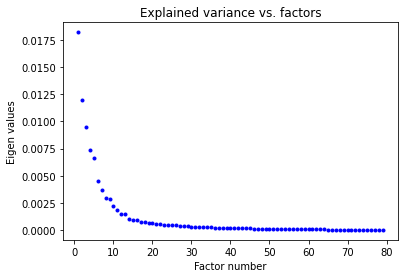

In [38]:
# instantiation
#sc = StandardScaler()
#Z = sc.fit_transform(newNonCommonTopicsDists) # data are scaled
acp = PCA(svd_solver='full')

# principal component
coord = acp.fit_transform(npComsNonCommonTopicDists)
# corrected explained variance
n=len(npComsNonCommonTopicDists)
eigval = (n-1)/n*acp.explained_variance_

# plot
p=len(eigval)
plt.plot(np.arange(1,p+1),eigval,'b.')
plt.title("Explained variance vs. factors")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

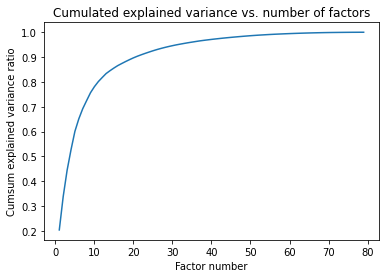

In [39]:
# Cumulated explained variance vs. number of factors
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Cumulated explained variance vs. number of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

From the graph we can see that the cumulated explained variance reaches 0.95 at around 30 factors.

### 4.3.2. Manual Clustering
<div id="4-3-2"></div>
Before developing an automatic clustering process, we will manually build clusters of similar communities. By doing this, we can be sure our clusters are logical. After automating the process, we can check back to validate our algorithm. Also, by doing the clustering manually, it allows us to more easily develop an algorithm.

Our manual clustering process works as the following:
For each couple of dimensions of the PCA ((0,1), (2,3), ...), we plot our data, where each point is a community. Just by looking at the plot, we can easily spot clusters of communities. For example, for dimensions 0 and 1:

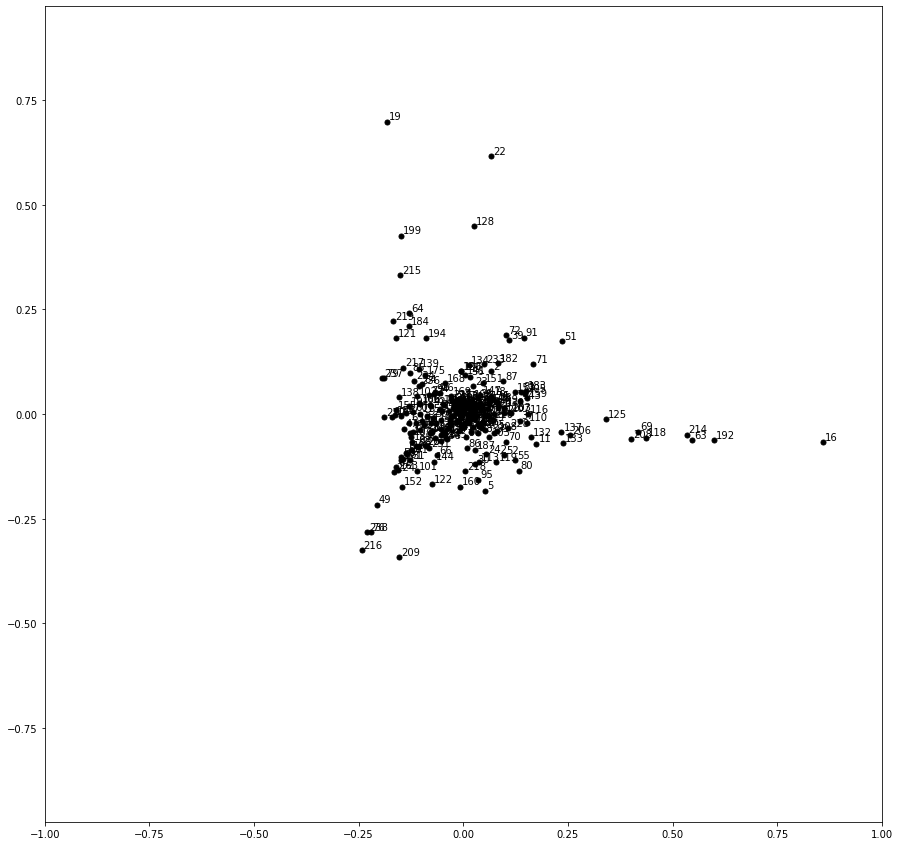

In [40]:
dim_1,dim_2 = 0,1
offset = np.array([0.005,0.005])
fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(15,15))
axes.autoscale()  # auto-scale
for idx in range(len(coord)):
    axes.scatter(coord[idx,dim_1],coord[idx,dim_2],c='black',s=25)
    axes.axis('equal')
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    axes.annotate(text=str(idx),xy=coord[idx,np.array([dim_1,dim_2])]+offset)
plt.show()

From our first plot, we can build 4 clusters. The first cluster concerns all the communities in the center. `[19,22,198,128,215]` is another.

We do this for each set of dimensions up to where the cumulated explained variance reaches 95%. In our case, 30 factors. So we plot from dimensions (0,1) to (28,29). For each plot, the perspective is altered. For example, for (0,1), we found `[19,22,198,128,215]`. But if for (2,3), community 128 finds itself in it's own cluster, then we'll remove it from `[19,22,198,128,215]`. to form two clusters: `[19,22,198,215]` and `[128]`.


The final result is the following:

In [41]:
cluster_manual_ = [
    [  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,
        13,  14,  15,  17,  18,  20,  21,  23,  24,  25,
        26,  27,  28,  29,  30,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  64,
        66,  68,  70,  71,  72,  73,  74,  75,  77,
        78,  79,  80,  81,  82,  83,  84,  86,  87,  89,  90,
        91,  92,  93,  94,  96,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 120, 121, 122, 123, 124, 126, 127, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 149, 150, 151, 153, 154, 155,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 172, 173, 174, 175, 176, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194,
       195, 196, 198, 201, 202, 203, 204, 205, 206, 207,
       210, 211, 212, 213, 217,
       221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233,
       235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248], # default group
    [ 19,  22,  128, 199], [ 16,  63,  69, 118, 125, 192, 208, 214],[ 76, 209], # dim 0,1
    [ 31,  95, 152, 218],[ 12, 156, 200, 219], # 2,3
    [197],[177], # dim 4,5
    [65],[49],[215], # dim 6,7
    [8], # dim 8,9
    [32], [238], # dim 10,11
    [85],[225], # dim 16,17
    [88],[97],[62], # dim 18,19
    [220],[234],[216], # dim 20,21
    [67], # dim 22,23
    [171], # dim 26,27
    [148],[119] # dim 28,29
]
# there are 42 points in total in the special clusters

To understand better, here are all the plots from dimensions (0,1) to (38,39):

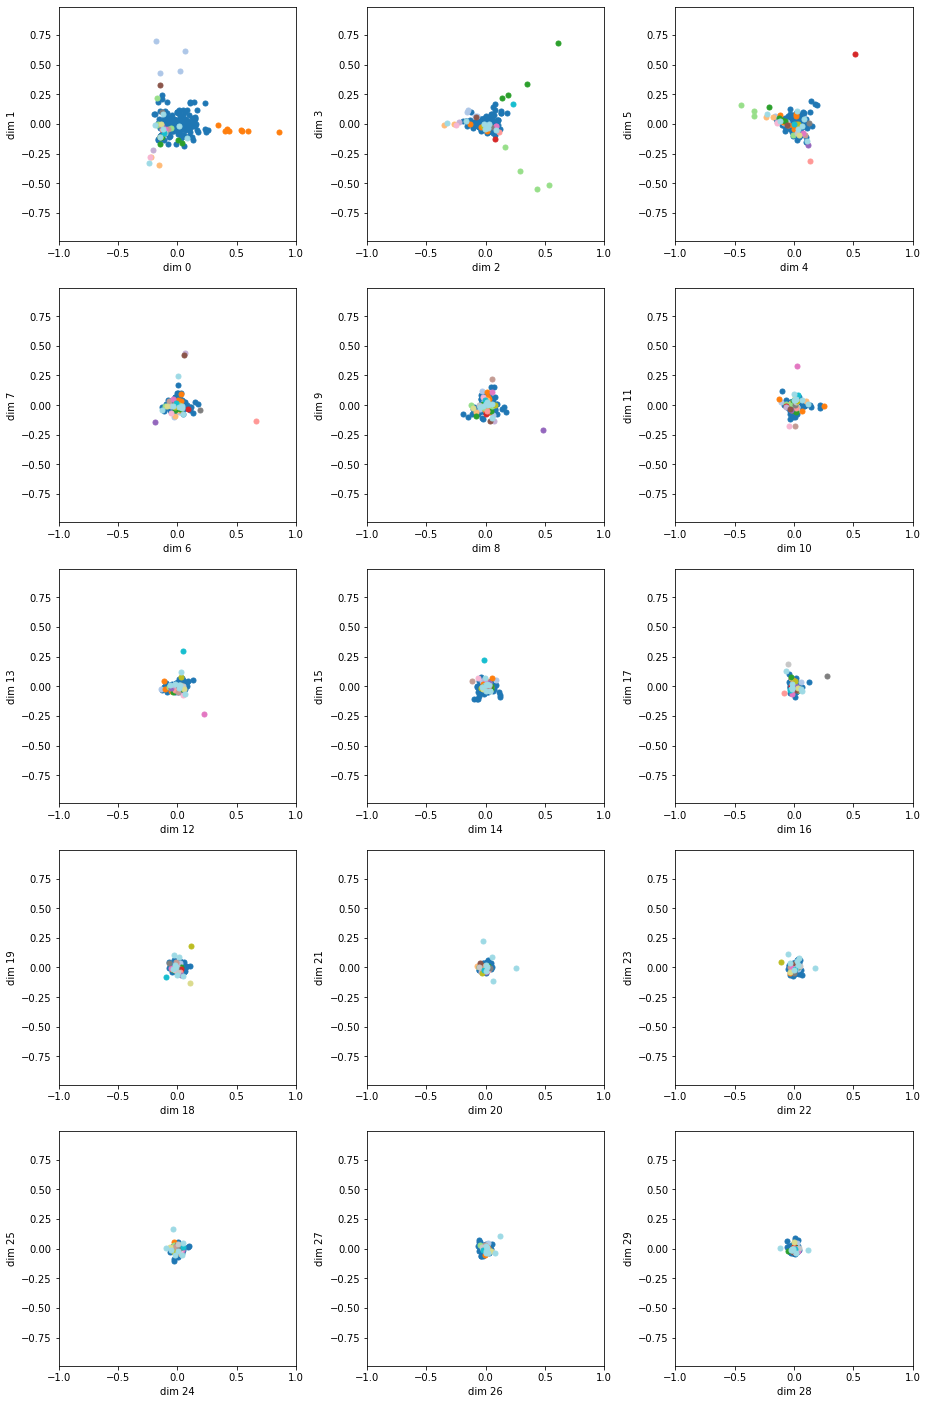

In [42]:
# parameters
range_max_ =  15 # even integer
n_rows_ = int(range_max_/3)
n_col_ = 3
wspace_ = 0.3
point_size_ = 25

palette = plt.get_cmap('tab20')

# plots
fig, axes = plt.subplots(ncols=n_col_,nrows=n_rows_,figsize=(5*n_col_+wspace_,5*n_rows_))
for i in range(range_max_):
    dim_1,dim_2 = 2*i,2*i+1
    for col,clus in enumerate(cluster_manual_):
        axes[int(i/3),i%3].scatter(coord[clus,dim_1],coord[clus,dim_2],color=palette(col),s=point_size_)
        axes[int(i/3),i%3].axis('equal')
        axes[int(i/3),i%3].set_xlim(-1,1)
        axes[int(i/3),i%3].set_ylim(-1,1)
        axes[int(i/3),i%3].set_xlabel(f'dim {dim_1}')
        axes[int(i/3),i%3].set_ylabel(f'dim {dim_2}')
plt.subplots_adjust(wspace=wspace_)
plt.show()

We can go further and apply TSNE to visualize our clustering. This is a way to see visualize the effectiveness of our manual clustering.

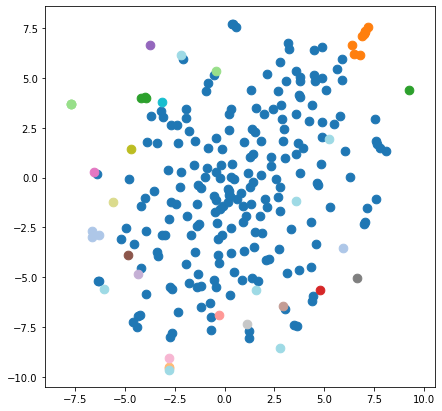

In [43]:
coloration_manual_ = np.zeros((249,))
for key,cluster in enumerate(cluster_manual_):
    for i in cluster:
        coloration_manual_[i] = key

# instantiation
tsne = TSNE(n_components=2)
# principal component
coordTSNE = tsne.fit_transform(npComsNonCommonTopicDists)


dim_1,dim_2 = 0,1
palette = plt.get_cmap('tab20')
fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(7,7))
for col,clus in enumerate(cluster_manual_):
    #axes.grid()
    axes.scatter(coordTSNE[clus,dim_1],coordTSNE[clus,dim_2],color=palette(col),s=75)
    axes.axis('equal')
    #axes.set_xlabel(f'1st factor, {round(eigval[0]*100,1)}% explained inertia',fontsize=10)
    #axes.set_ylabel(f'2st factor, {round(eigval[1]*100,1)}% explained inertia',fontsize=10)
plt.show()

So not bad, we can cleary distinguish clusters.

### 4.3.3. Automatic Clustering
<div id="4-3-3"></div>

We are happy with our manual clustering. Now we can convert the thinking process into code and automate the clustering process. See the `automaticCommunityClustering()` function. The two functions following this cell will be used in the automatic clustering function.

In [44]:
def removeDuplicateSmallClusters(clusters):
    """
    remove duplicate small clusters from clusters. 
    Example: [[0],[1,2],[1,2],[3,4,5]] -> [[0],[1,2],[3,4,5]]
    
    :param clusters: the clusters from which to remove duplicates
    
    :type clusters: list
    
    :return: filtered clusters
    :rtype: list
    """
    
    smallClusters = [cls for cls in clusters if cls != clusters[0]]
    smallClusters.sort()
    newSmallClusters = list(smallClusters for smallClusters,_ in itertools.groupby(smallClusters))
    clusters = [clusters[0]] #list(filter(lambda x:len(x) > maximumSmallClusterSize,clusters))
    for cluster in newSmallClusters:
        clusters.append(cluster)
        
    return clusters

In [45]:
def separateSingletonsFromClusters(clusters):
    """
    remove/separate singletons from clusters. Example: [[0],[0,1],[3,4,0,5]] -> [[0],[1],[3,4,5]]
    
    :param clusters: the clusters from which to separate singletons
    
    :type clusters: list
    
    :return: clusters
    :rtype: list
    """
    
    singletons = [cluster for cluster in clusters if len(cluster) == 1]
    for singleton in singletons:
        for cluster in [cluster for cluster in clusters if not cluster in singletons]:
            if singleton[0] in cluster: # singleton exists in another cluster. Then remove it from cluster.
                cluster.remove(singleton[0])
                
    return clusters

In [46]:
def removeSubClusters(clusters):
    """
    remove subclusters. Example: [[0,1],[0,1,2]] => [[0,1,2]]
    
    :param clusters: the clusters
    
    :type clusters: list
    
    :return: clusters without sub clusters
    :rtype: list
    """
    
    smallClusters = [cls for cls in clusters if cls != clusters[0]]
    for lst in clusters:
        for otherlst in [cls for cls in smallClusters if cls != lst]:
            count = 0
            for elt in lst:
                if elt in otherlst and len(lst) < len(otherlst):
                    count += 1
            if count == len(lst): # it"s a sublist
                try:
                    clusters.remove(lst)
                except:
                        break
    return clusters

In [47]:
def removeComsFromLargeCluster(clusters):
    """
    remove coms from large cluster that are in small clusters.
    Example: [[0,1],[1,2,3]] => [[0],[1,2,3]]
    
    :param clusters: the clusters
    
    :type clusters: list
    
    :return: clusters
    :rtype: list
    """
    
    smallClusters = [cls for cls in clusters if cls != clusters[0]]
    for cluster in smallClusters:
        for com in cluster:
            if com in clusters[0]:
                clusters[0].remove(com)

    return clusters

In [48]:
def mergeSimilarClusters(clusters,similarityThreshold):
    """
    Merge similar clusters (minimum similarity of 75%).
    Example: [[0,1,2,3],[1,2,3,4],[78,54] => [[0,1,2,3,4],[78,54]]
    
    :param clusters: the clusters
    :param similarityThreshold: similarity threshold. float between 0 and 1. 
                                The lower, the less similar the clusters have to be in order to be merged.
    
    :type clusters: list
    :type similarityThreshold: float
    
    :return: see example 
    :rtype: list
    """
    
    smallClusters = [cls for cls in clusters if cls != clusters[0]]
    for lst in [l for l in smallClusters if len(l) > 1]:
        for otherlst in [l for l in smallClusters if l != lst and len(l) > 1]:
            count = 0
            for elt in lst:
                if elt in otherlst:
                    count += 1
            p = count/len(lst)
            if p >= similarityThreshold:
                clusters.append(list(set(set(lst).union(set(otherlst)))))
                try:
                    clusters.remove(lst)
                except:
                    break
                    
    return clusters

In [49]:
def automaticCommunityClustering(npComsNonCommonTopicDists,clusterSparsity,maximumSmallClusterSize,similarityThreshold,acp,coord):
    """
    automate Edouard's manual clustering. The clustering creates clusters of similar communities.
    
    :param npComsNonCommonTopicDists: topic distributions for communities as a numpy array. shape: (249,79). See top of page.
    :param clusterSparsity: the higher this nb is, the more clusters there are (choose from ~50 -> ~100) 
    :param maximumSmallClusterSize: all cluster of size maximumSmallClusterSize and smaller are considered small clusters
    :param similarityThreshold: similarity threshold. float between 0 and 1. The lower it is, the less similar clusters have to be in order for them to be merged.
    :param acp: PCA(svd_solver='full')
    :param coord: principal component (see pca above)
    
    :type npComsNonCommonTopicDists: numpy.array
    :type clusterSparsity: int 
    :type maximumSmallClusterSize: int
    :type similarityThreshold: float
    :type acp: sklearn.decomposition.pca.PCA
    :type coord: numpy.ndarray
    
    :return: a list where each element is a cluster (type list)
    :rtype: list
    """
    
    # intialise clustering as an empty list
    clusters = []

    # find dimensions of interest
    dims = list(np.where(np.cumsum(acp.explained_variance_ratio_) < 0.95)[0])
    
    # if the length of dims is not a multiple of two, delete the last element (we want couples of dimensions).
    if len(dims) % 2 != 0: 
        dims.remove(dims[-1])
    
    # create couples (0,1), (2,3), ...
    dimsCouples = list(zip([elt for elt in dims if elt % 2 == 0],[elt for elt in dims if elt % 2 != 0]))
    
    # We want to do what Edouard did in his manual clustering. 
    # He checked for clusters for each couple of dimensions.
    # So we loop though each couple of dimensions:
    for dim1,dim2 in dimsCouples:    
        
        # we're going to do a K-Means clustering for each couple. 
        # For this, we need K, the number of clusters.
        # In our case, K depends on the average distance between data points (communities) and clusterSparsity.
        # So K is greater when the data is more spaced out, i.e. more clusters
        # We also don't let K go lower than 8.
        # If K < 8, the clustering tends to form two clusters from the main large cluster, which we want to consider as one.
        
        # calculate the average distance between data points
        distList = list(cdist(XA=np.array(list(zip(coord[:,dim1],coord[:,dim2]))),XB=np.array(list(zip(coord[:,dim1],coord[:,dim2])))))
        avgDist = sum([item for sublist in distList for item in sublist])/len([item for sublist in distList for item in sublist])

        # calculate K (=nbClusters)
        nbClusters = math.floor(avgDist*clusterSparsity)
        if nbClusters < 8:
            nbClusters = 8

        # perform K-Means clustering
        fitACP = KMeans(n_clusters=nbClusters,init="random",n_init=1)
        myKMeansACP = fitACP.fit(X=np.array(list(zip(coord[:,dim_1],coord[:,dim_2]))))

        # Now that we have our clusters, we want to find our one large cluster and then our small clusters
        # the small clusters are where len(cluster) <= 8
        
        # IMPORTANT: We only add the large cluster to clusters in the first iteration of "for dim1, dim2 in" etc.

        largeClusters = [] # this var is not called largeCluster because largeCluster will be largeClusters flattened
        smallClusters = []
        
        # We loop through the sizes of the clusters and pick out large and small clusters
        i = 0
        for clusterCount in np.bincount(myKMeansACP.labels_):
            if clusterCount > maximumSmallClusterSize:  #> 9:
                largeClusters.append(np.where(myKMeansACP.labels_ == i))
            else:
                smallClusters.append(np.where(myKMeansACP.labels_ == i))
            i += 1
        
        # now we can create our large cluster by flattening the large clusters into one large cluster
        largeCluster = [item for sublist in [list(a[0]) for a in largeClusters] for item in sublist]
        
        # final adjustments to smallClusters
        smallClusters = [list(a[0]) for a in smallClusters]
        
        # only add biggest cluster to clusters if it's the first iteration (clusters = [])
        if len(clusters) == 0:
            clusters.append(largeCluster)
            
        # add small clusters to clusters
        for cluster in smallClusters:
            clusters.append(cluster)
            
        # Don't forget that we are doing KMeans for each couple of dimensions.
        # It is entirely possible that the same small cluster is detected for different dimensions
        # Here we remove the duplicates
        clusters = removeDuplicateSmallClusters(clusters)
            
        # It is also possible that KMeans produces a cluster that is just a trimmed version of 
        # a pre-existing cluster. Here we remove these sub clusters
        clusters = removeSubClusters(clusters)

        # if find cluster alone but already exists in other cluster: remove it from cluster so it can be alone
        clusters = separateSingletonsFromClusters(clusters)
        
        # After iterating through lot's of dimensions, it is also entirely possible that K-Means produces
        # clusters that have elements in our large cluster defined at the beginning.
        # In this case, we need to remove these elements from the large cluster
        # (remove coms from large cluster if present in small coms)
        clusters = removeComsFromLargeCluster(clusters)
                    
        # K-Means might also produce small clusters that are similar, so let's merge them together
        # The threshold of similarity is given by similarityThreshold
        clusters = mergeSimilarClusters(clusters,similarityThreshold)
                    
        # remove sub clusters again (to be sure)
        clusters = removeSubClusters(clusters)

    # remove duplicate small clusters again (to be sure)
    clusters = removeDuplicateSmallClusters(clusters)

    # return clusters, but sort each cluster so result looks like [[0,1],[2,3,4],...]    
    return [sorted(cluster) for cluster in clusters]
        


In [50]:
comsClusters = automaticCommunityClustering(npComsNonCommonTopicDists,80,9,0.75,acp,coord)
for cluster in comsClusters:
    print(cluster) # ,[ 12, 156, 200, 219],

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 70, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 119, 120, 122, 123, 124, 126, 127, 129, 130, 131, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 207, 210, 211, 212, 213, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248]
[11, 110, 116, 125, 132, 133, 

Let's run a TSNE to check our automatic clustering:

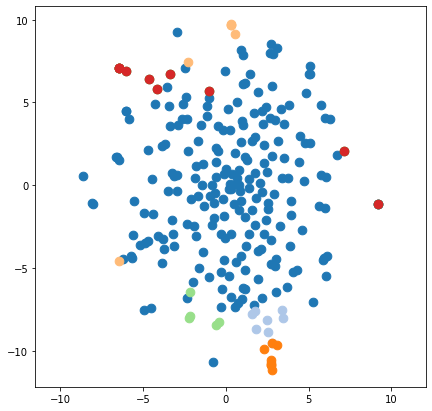

In [51]:
coloration_manual_ = np.zeros((249,))
for key,cluster in enumerate(comsClusters):
    for i in cluster:
        coloration_manual_[i] = key

# instantiation
tsne = TSNE(n_components=2)
# principal component
coordTSNE = tsne.fit_transform(npComsNonCommonTopicDists)


dim_1,dim_2 = 0,1
palette = plt.get_cmap('tab20')
fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(7,7))
for col,clus in enumerate(comsClusters):
    #axes.grid()
    axes.scatter(coordTSNE[clus,dim_1],coordTSNE[clus,dim_2],color=palette(col),s=75)
    axes.axis('equal')
    #axes.set_xlabel(f'1st factor, {round(eigval[0]*100,1)}% explained inertia',fontsize=10)
    #axes.set_ylabel(f'2st factor, {round(eigval[1]*100,1)}% explained inertia',fontsize=10)
plt.show()

We can clearly make out clusters, our automatic clustering isn't too bad.

## 4.4. Study each topic's entropy
<div id="4-4"></div>

In this section, we're going to study entropy. For a quick reminder, in information theory, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes. 

First of all, let $T$ be the random varibale modeling the possible topics. Let $C$ be the random variable modeling the possible communities. Let's say for example that we're interested in topic $\alpha$, $0 \leq \alpha < M$, where $M$ is the number of topics. Then let $C^{T_\alpha}$ be the random variable with probability masse function $\mathbb{P}(C^{T_\alpha} = C_k)=P(C_k | T_\alpha)$. This variable models the probability that topic $T_\alpha$ is present in each community.

We're interested in a topic's entropy. A topic $T_\alpha$ with high entropy will be a topic where the events $T_\alpha | C$ tend to have equiprobability. If $T_\alpha$ has low entropy, this means that we talk about it in few communities. On the other hand, if $T_\alpha$ has high entropy, this means that we talk about it in many communities.


Let $0 \leq i < N$, where $N$ is the number of communities. We can now define the entropy $H$ for $C^{T_\alpha}$ as:

\begin{equation}
            H(C^{T_\alpha}) = - \displaystyle \sum_{i = 0}^{N-1} P(C_i | T_\alpha) \cdot \log (P(C_i | T_\alpha))
\end{equation}

The topic distribution for a community is defined as $P(T | C_i)$. So $P(T_\alpha|C_i)$ is the proportion of words in community $C_i$ that are assigned to topic $T_\alpha$. But our entopy formula requires $P(C_i | T_\alpha)$: the proportion of community $C_i$ in topic $T_\alpha$, meaning how representative community $C_i$ is of topic $T_\alpha$.

We can use Bayes' theorem to solve $P(C_i | T_\alpha)$:

\begin{equation}
 P(C_i | T_\alpha) = \frac{P(T_\alpha|C_i)P(C_i)}{P(T_\alpha)}
\end{equation}

with $P(T_\alpha)$ and $P(C_i)$, the general probabilites for $T_\alpha$ and $C_i$, defined as: 

\begin{equation}
    P(T_\alpha) = \frac{\displaystyle\sum_{i=0}^{N-1} P(T_\alpha|C_i)}{ \displaystyle\sum_{j=0}^{M-1} \sum_{i=0}^{N-1} P(T_j|C_i) } \ \ \ \text{and} \ \ \ P(C_i) = \frac{\text{Card}(C_i)}{U}
    \end{equation}
    
[comment]: <> (= \frac{\displaystyle\sum_{l=0}^{U-1} \mathcal{A}_{i,l}}{ \displaystyle\sum_{k=0}^{N-1} \sum_{l=0}^{U-1} \mathcal{A}_{k,l}})
$U$ is the number of users.   

### 4.4.1. Calculate intermediate probabilities
<div id="4-4-1"></div>

Before calculating $H$, we need $P(T_\alpha)$, $P(C_i)$ and then $P(C_i|T_\alpha)$:

- $P(T_\alpha)$

In [52]:
npNewComsTopicsDists = np.array([[b for (a,b) in sorted(lst,key=lambda x:x[0],reverse=False)] for lst in list(newComsTopicDists.values())])

In [53]:
def P_of_Talpha(npComsTopicsDists,T_alpha):
    """
    Calculate P(T_alpha)
    
    :param npComsTopicsDists: (np.array): np array of topic distributions for communities                         
    :param T_alpha: topic T_alpha
    
    :type npComsTopicsDists: numpy.array
    :type T_alpha: int
    
    :return: P(T_alpha)
    :rtype: float
    
    """
    
#     # all 79 topics
#     listOfTopics = [t for (t,p) in list(comsNonCommonTopicDists.values())[0]]
#     sum1 = sum([[p for (t,p) in lst if t == T_alpha][0] for lst in list(comsNonCommonTopicDists.values())])
#     sum2 = sum([sum([[p for (t,p) in lst if t == topic][0] for lst in list(comsNonCommonTopicDists.values())]) for topic in listOfTopics])
#     return sum1/sum2

    return (npComsTopicsDists.sum(axis=0)/npComsTopicsDists.sum())[T_alpha]

- $P(C_i)$

We want to calculate the entropy for all topics. If we approach this naively, then we'll end up calculating $P(C)$ for each topic, which is costly in terms of time. So let's calculate $P(C)$ once and store it in the `pC` dictionary. Each key is a community id and each value is $P(C_i)$.

In [54]:
def P_of_Ci(timeStamp,level,C_i):
    """
    Calculate P(C_i)
    
    :param timeStamp: community tree at timestamp 'timeStamp'
    :param level: level of community tree
    :param C_i: community with id 'C_i' 
    
    :type timeStamp: float
    :type level: int
    :type C_i: {bytes,str}
    
    :return: P(C_i)
    :rtype: float
    """
    
#     orderOfCommunity = [n for n in range(len(list(comsNonCommonTopicDists.keys()))) if list(comsNonCommonTopicDists.keys())[n] == C_i][0]
#     sum1 = sum([A[orderOfCommunity][l] for l in range(len(listOfUsers))])
#     sum2 = sum([sum([A[k][l] for l in range(len(listOfUsers))]) for k in range(len(list(comsNonCommonTopicDists.keys())))])
#     return sum1/sum2

    listOfUsers = list(data['graph'].nodes)

    communitiesDict = getCommunitiesFromLevel(timeStamp,level)

    return len(getUserIDsFromCommunity(timeStamp, level, C_i,communitiesDict))/len(listOfUsers)

In [55]:
pC = {}
for C_i in list(comsNonCommonTopicDists.keys()):
    pC[C_i] = P_of_Ci(exampleTimeStamp,3,C_i)

- $P(T_\alpha | C_i)$

In [56]:
def P_of_Talpha_knowing_Ci(comsTopicDists,C_i,T_alpha):
    """
    Get P (T_\alpha | C_i)
    
    :param comsTopicDists: community topic distributions. See top of page.
    :param C_i: community with id 'C_i' 
    :param T_alpha: topic T_alpha
    
    :type comsTopicDists: dict
    :type C_i: {bytes,str}
    :type T_alpha: int
    
    :return: P(T_\alpha | C_i)
    :rtype: float
    """
    
    # comsNonCommonTopicDists
    return [p for (t,p) in comsTopicDists[C_i] if t == T_alpha][0]

- $P(C_i | T_\alpha)$

In [57]:
def P_of_Ci_knowing_Talpha(comsTopicDists,npComsTopicsDists,C_i,T_alpha):
    """
    Calculate  P(C_i | T_\alpha)
    
    :param comsTopicDists: community topic distributions. See top of page.
    :param npComsTopicsDists: (np.array): np array of topic distributions for communities                         
    :param C_i: community with id 'C_i' 
    :param T_alpha: topic T_alpha
    
    :type comsTopicDists: dict
    :type npComsTopicsDists: numpy.array
    :type C_i: {bytes,str}
    :type T_alpha: int
    
    :return: P(C_i | T_\alpha)
    :rtype: float
    """
    return (P_of_Talpha_knowing_Ci(comsTopicDists,C_i,T_alpha) * pC[C_i]) / P_of_Talpha(npComsTopicsDists,T_alpha)

    # or in the naive approach:
    # return (P_of_Talpha_knowing_Ci(C_i,T_alpha) * P_of_Ci(C_i)) / P_of_Talpha(T_alpha)

### 4.4.2. Define $H$ and calculate $H$ for all topics
<div id="4-4-2"></div>

In [58]:
def H(comsTopicDists,npComsTopicsDists,T_alpha):
    """
    calculate (H(C^{T_alpha})) using scipy.stats.entropy
    
    :param comsTopicDists: community topic distributions. See top of page.
    :param npComsTopicsDists: (np.array): np array of topic distributions for communities                         
    :param T_alpha: topic T_alpha
    
    :type comsTopicDists: dict
    :type npComsTopicsDists: numpy.array
    :type T_alpha: int
    
    :return: H
    :rtype: float
    """
    
    p = [P_of_Ci_knowing_Talpha(comsTopicDists,npComsTopicsDists,C_i,T_alpha) for C_i in list(comsTopicDists.keys())]

    return entropy(pk=p)

In [59]:
sortedTopics = sorted([t for (t,p) in list(newComsTopicDists.values())[0]])
topicEntropies = {}
for topic in sortedTopics:
    topicEntropies[topic] = H(newComsTopicDists,npNewComsTopicsDists, topic)

### 4.4.3. Analyse results
<div id="4-4-3"></div>

Let's plot the topic's entropies, sorted: 

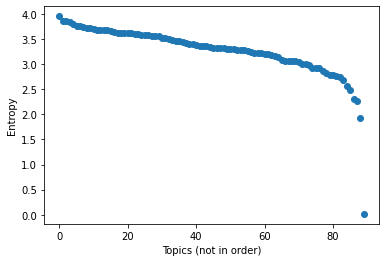

In [60]:
plt.scatter(range(90),[b for (a,b) in sorted(topicEntropies.items(), key=lambda item: item[1],reverse=True)])
plt.xlabel("Topics (not in order)")
plt.ylabel("Entropy")
plt.show()

From this graph, we can see that a few topics stand out with high entropies and a few stand out with low entropies. Some of these topics are the following:

In [61]:
np.where(np.array(list(topicEntropies.values())) > 3.85)

(array([ 1, 23, 78]),)

In [62]:
np.where(np.array(list(topicEntropies.values())) < 2.3)

(array([36, 53, 67]),)

In [63]:
highEntropyTopics = [1, 23, 78]
lowEntropyTopics = [36, 53, 67]

(array([[215.,  27.,   5.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 80.,  81.,  51.,  19.,   4.,   8.,   1.,   0.,   1.,   0.,   2.,
           0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 55.,  33.,  59.,  46.,  28.,  14.,   2.,   4.,   0.,   1.,   2.,
           1.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]]),
 array([2.6907814e-09, 4.9999259e-02, 9.9998519e-02, 1.4999777e-01,
        1.9999704e-01, 2.4999629e-01, 2.9999554e-01, 3.4999481e-01,
        3.9999408e-01, 4.4999331e-01, 4.9999258e-01, 5.4999185e-01,
        5.9999108e-01, 6.4999038e-01, 6.9998962e-01, 7.4998885e-01,
        7.9998815e-01, 8.4998739e-01, 8.9998662e-01, 9.4998592e-01,
        9.9998516e-01], dtype=float32),
 <a list of 3 BarContainer objects>)

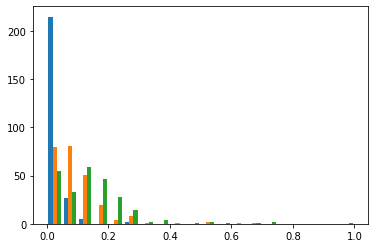

In [64]:
plt.hist(npNewComsTopicsDists[:,highEntropyTopics],bins=20)

<b>Help interpreting histogram:</b> Topic 23  is talked about more than 4,9% in 81 communities. It is also talked about more than 29,9% in 1 community.

(array([[242.,   1.,   3.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [249.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [241.,   3.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([8.1805361e-11, 3.3975274e-03, 6.7950548e-03, 1.0192582e-02,
        1.3590110e-02, 1.6987637e-02, 2.0385165e-02, 2.3782691e-02,
        2.7180219e-02, 3.0577745e-02, 3.3975273e-02, 3.7372801e-02,
        4.0770330e-02, 4.4167854e-02, 4.7565382e-02, 5.0962910e-02,
        5.4360438e-02, 5.7757966e-02, 6.1155491e-02, 6.4553022e-02,
        6.7950547e-02], dtype=float32),
 <a list of 3 BarContainer objects>)

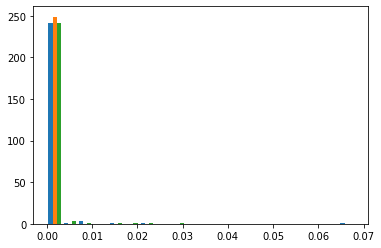

In [65]:
plt.hist(npNewComsTopicsDists[:,lowEntropyTopics],bins=20)

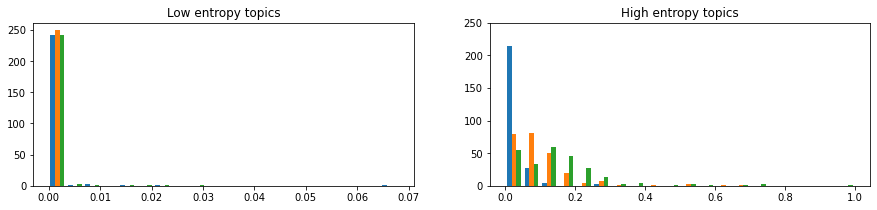

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
axes[0].hist(npNewComsTopicsDists[:,lowEntropyTopics],bins=20)
axes[0].title.set_text("Low entropy topics")
axes[1].hist(npNewComsTopicsDists[:,highEntropyTopics],bins=20)
axes[1].title.set_text("High entropy topics")
plt.ylim(top=250)

plt.show()

Here we are comparing the histograms for the low entropy topics and the high entropy topics. There are three topics for each histogram.

As we know, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes. This is cleary shown here. 

In the first histogram, the low entropy topics are talked about in almost every community but with a probability close to 0 ($ \sim 10^{-11}$). We can basically conisder these topics as non-existant. So like we said previously, topics with low entropy tend not to be talked about. To take another example, topic 67  is talked about more than 1.019% in only one community (see `plt.hist(npNewComsTopicsDists[:,lowEntropyTopics],bins=20)`) 

In the second histogram, this is not the case. The topics here are more widespread throughout the communities. For example topic 23 is talked about more than 4,9% in 81 communities.

## 4.5. Study each community's entropy
<div id="4-5"></div>

Previously, we studied each topic's entropy. We can also do the same but with communities. A community with high entropy will be a community that talks about a wide range of topics, a community that isn't necessarily primarily focused on one topic. A community with low entropy will be a community that talks about one topic primarily, "mono-topical".

Let $T^{C_\alpha}$ be the random variable with probability masse function $\mathbb{P}(T^{C_\alpha} = T_k)=P(T_k | C_\alpha)$. Let $0 \leq i < M$ and $0 \leq \alpha < N$, where $M$ is the number of topics and $N$ is the number of communities. We can now define the entropy $H$ for $T^{C_\alpha}$ as:

\begin{equation}
            H(T^{C_\alpha}) = - \displaystyle \sum_{i = 0}^{M-1} P(T_i | C_\alpha) \cdot \log (P(T_i | C_\alpha))
\end{equation}


### 4.5.1. Define $H$ and calculate $H$ for all communities
<div id="4-5-1"></div>

In [67]:
def Hc(npComsTopicDists,C_alpha):
    """
    calculate (H(T^{C_alpha})) using scipy.stats.entropy
    
    :param npComsTopicsDists: (np.array): np array of topic distributions for communities                         
    :param C_alpha: order of community C_alpha 
    
    :type npComsTopicsDists: numpy.array
    :type C_alpha: int
    
    :return: H
    :rtype: float
    """

    #p = [P_of_Talpha_knowing_Ci(comsTopicDists,C_alpha,T_i) for T_i in range(90)]

    return entropy(pk=npComsTopicDists[C_alpha]) #- sum([elt *log(elt) for elt in p])

In [68]:
communityIDs = newComsTopicDists.keys()
communityEntropies = {}
i = 0
for com in communityIDs:
    communityEntropies[com] = Hc(npNewComsTopicsDists,i)
    i += 1

### 4.5.2. Analyse results
<div id="4-5-2"></div>

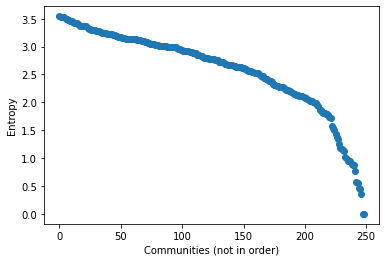

In [69]:
plt.scatter(range(len(newComsTopicDists)),[b for (a,b) in sorted(communityEntropies.items(), key=lambda item: item[1],reverse=True)])
plt.xlabel("Communities (not in order)")
plt.ylabel("Entropy")
plt.show()

Already, this graph ressembles the topic entropies graph. Let's define five communities with high entropy and five communities with low entropy:

In [70]:
np.where(np.array(list(communityEntropies.values())) < 0.5)

(array([ 12,  16,  19, 152, 197]),)

In [71]:
np.where(np.array(list(communityEntropies.values())) > 3.5)

(array([ 73, 100, 117, 185, 202]),)

In [72]:
highEntropyCommunities = [ 73, 100, 117, 185, 202]
lowEntropyCommunities = [ 12,  16,  19, 152, 197]

If we produce the same plots as done previously, but with the topic distributions of our high entropy and low entropy communities, we get the following: 

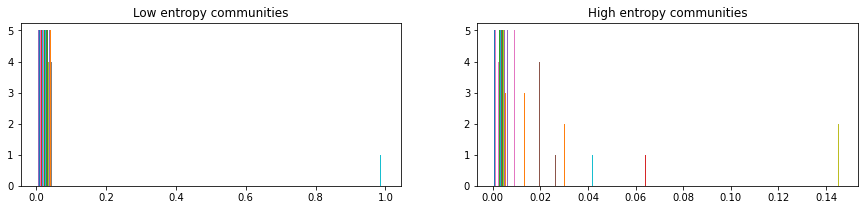

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
axes[0].hist(npNewComsTopicsDists[lowEntropyCommunities,:],bins=20)
axes[0].title.set_text("Low entropy communities")
axes[1].hist(npNewComsTopicsDists[highEntropyCommunities,:],bins=20)
axes[1].title.set_text("High entropy communities")

plt.show()

No need to explain the histograms again, they're self-explanatory (see previous histograms above).

Our low entropy communities are communities 12, 16, 19, 152 and 197. When we used `cdist` and the euclidean distance to find communities dominated by one topic, these ones came up too. So both methods are adequate in finding communities characterized primarily by one topic. 

## 4.6. Further analysis
<div id="4-6"></div>

### 4.6.1. Analyse $P(T)$
<div id="4-6-1"></div>

First of all, let's calculate $P(T)$ <i> i.e. </i> the weight of each topic and then plot the sorted results:

In [74]:
topicWeights = {}
for t in sortedTopics:
    topicWeights[t] = P_of_Talpha(npNewComsTopicsDists,t)

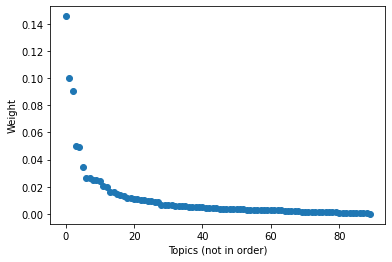

In [75]:
plt.scatter(range(len(sortedTopics)),[b for (a,b) in sorted(topicWeights.items(), key=lambda item: item[1],reverse=True)])
plt.xlabel("Topics (not in order)")
plt.ylabel("Weight")
plt.show()

As we can see, a few topics (about 6) have a significantly greater weight than the majority of topics. No topics seem to have a significantly low weight compared to the others. What we can take from this is that there are 6 dominant topics and a relatively equal distribution for the rest. Let's define the big weight topics and the small weight topics:

In [76]:
np.where(np.array(list(topicWeights.values())) > 0.03)

(array([14, 23, 42, 69, 73, 78]),)

In [77]:
np.where(np.array(list(topicWeights.values())) < 0.0005)

(array([20, 28, 53, 67]),)

In [78]:
bigWeightTopics = [14, 23, 42, 69, 73, 78]
smallWeightTopics = [20, 28, 53, 67]

The keywords of two of the weighty topics (14,78) are:

In [79]:
print(getTopicKeyWords(genModel,14,90,10))
print(getTopicKeyWords(genModel,78,90,10))

['macron', 'hamon', 'fillon', 'parler', 'vouloir', 'média', 'face', 'soutiens', 'juppé', 'million']
['macron', 'voter', 'fillon', 'tour', 'vote', 'mélenchon', 'sondage', 'presidentielle2017', 'présidentielle', 'hamon']


The keywords of two of the not so weighty topics (20,67) are:

In [80]:
print(getTopicKeyWords(genModel,20,90,10))
print(getTopicKeyWords(genModel,67,90,10))

['convaincant', 'habitude', 'charte', 'pensé', 'promouvoir', 'messe', 'bouger', 'enmarch', 'montreuil', 'opportunisme']
['militante', 'troll', 'malade', 'sanction', 'explosion', 'audace', 'diesel', 'objectifs', 'malhonnêteté', 'magique']


These two sets of keywords clearly make sense. The first set talk about Macron and Fillon whereas the topics with small weight don't.

If we take a look at the most dominant topics of the low entropy communities, we can see that some of them are weighty topics too: 

In [81]:
tt = []
for c in lowEntropyCommunities:
    print(newComsTopicDists[list(newComsTopicDists.keys())[c]][0],newComsTopicDists[list(newComsTopicDists.keys())[c]][0][0] in bigWeightTopics)
    tt.append(newComsTopicDists[list(newComsTopicDists.keys())[c]][0][0])

(87, 0.8829732) False
(78, 0.99998516) True
(14, 0.83664995) True
(69, 0.99991095) True
(73, 0.825556) True


Here topics <b>78</b>, <b>14</b>, <b>69</b> and <b>73</b> are all also topics with large weights. Let's also check the entropies for these topics:

In [82]:
for t in tt:
    print(H(newComsTopicDists,npNewComsTopicsDists, t))

3.2951449195377522
3.9516617768333786
3.838551635576933
3.5519336134131043
3.6679616434543068


In [83]:
np.quantile(list(topicEntropies.values()), 0.45) # t 87
np.quantile(list(topicEntropies.values()), 0.999) # t 78
np.quantile(list(topicEntropies.values()), 0.99) # t 14
np.quantile(list(topicEntropies.values()), 0.7) # t 69
np.quantile(list(topicEntropies.values()), 0.85) # t 73

3.673496495308875

In [84]:
sum([0.45,0.999,0.99,0.7,0.85])/5

0.7978000000000001

So on average, the dominant topics of the high entropy communities have entropies higher than 80% of other topics.

### 4.6.2. Analyse topic distributions of high entropy and low entropy communities
<div id='4-6-2'></div>

Firstly, let's display the 6 first topic probabilites for each of the high entropy communities:

In [85]:
for c in highEntropyCommunities:
    print(newComsTopicDists[list(newComsTopicDists.keys())[c]][:6])

[(78, 0.13552494), (23, 0.094156004), (14, 0.09062423), (73, 0.062757134), (42, 0.057081085), (69, 0.042547744)]
[(78, 0.14533165), (14, 0.111527845), (23, 0.08351084), (69, 0.06804297), (42, 0.053181913), (73, 0.043164235)]
[(78, 0.13880005), (14, 0.10463225), (23, 0.07741003), (42, 0.06709879), (73, 0.06609186), (68, 0.03288564)]
[(78, 0.13829121), (14, 0.10738753), (23, 0.09136266), (73, 0.06716509), (42, 0.05403945), (55, 0.039961684)]
[(78, 0.14674081), (14, 0.1079079), (23, 0.09293901), (73, 0.05607995), (42, 0.04581006), (55, 0.033386476)]


Interestingly, these 5 distributions reveal that topics 78, 14, 73 and 42 are all present. Not only are the distributions similar but the common topics are also low entropy topics (except 42). 

Now let's take a look at the low entropy communities:

In [86]:
for c in lowEntropyCommunities:
    print(newComsTopicDists[list(newComsTopicDists.keys())[c]][:6])

[(87, 0.8829732), (69, 0.11701698), (0, 1.11734764e-07), (1, 1.11734764e-07), (2, 1.11734764e-07), (3, 1.11734764e-07)]
[(78, 0.99998516), (0, 1.6673178e-07), (1, 1.6673178e-07), (2, 1.6673178e-07), (3, 1.6673178e-07), (4, 1.6673178e-07)]
[(14, 0.83664995), (68, 0.16334373), (0, 7.1852654e-08), (1, 7.1852654e-08), (2, 7.1852654e-08), (3, 7.1852654e-08)]
[(69, 0.99991095), (0, 9.999109e-07), (1, 9.999109e-07), (2, 9.999109e-07), (3, 9.999109e-07), (4, 9.999109e-07)]
[(73, 0.825556), (54, 0.17442933), (0, 1.6690532e-07), (1, 1.6690532e-07), (2, 1.6690532e-07), (3, 1.6690532e-07)]


Once again but unsurprisingly, the dominant topics here are topics 87, 78, 14, 69, 73. These are exactly the high entropy topics.

### 4.6.3. Analyse entropy of common topics
<div id='4-6-3'></div>

In [105]:
for t in {k for (k,v) in labeledTopics.items() if v}:
    print(H(newComsTopicDists,npNewComsTopicsDists, t))

3.0602339769360545
2.871011317759537
2.2607435340015627
2.9829614865752943
2.9294096755057684
3.201179686093334
2.672707070242393
0.01622761082237119
3.000613637287387
3.0571004763653953
2.49255068297105


In [143]:
np.quantile(list(topicEntropies.values()), 0.2)
np.quantile(list(topicEntropies.values()), 0.14)
np.quantile(list(topicEntropies.values()), 0.025)
np.quantile(list(topicEntropies.values()), 0.2)
np.quantile(list(topicEntropies.values()), 0.17)
np.quantile(list(topicEntropies.values()), 0.35)
np.quantile(list(topicEntropies.values()), 0.06)
np.quantile(list(topicEntropies.values()), 0.00001)
np.quantile(list(topicEntropies.values()), 0.2)
np.quantile(list(topicEntropies.values()), 0.2)
np.quantile(list(topicEntropies.values()), 0.05)

2.5270982672194213

In [144]:
sum([0.2,0.14,0.025,0.2,0.17,0.35,0.06,0.00001,0.2,0.2,0.05])/11

0.1450009090909091

So on average, the common topics have entropies lower than 85% of other topics. So generally the common topics have low entropy, which makes sense. Once again a common topic is where the events $T_\alpha | C$ tends to have equiprobability. In our case, this also correlates to not very spoken about topics.   

In [87]:
"""
WHAT TO DO ON WEBSITE: 


- Display common topics (button for each topic showing wordclouds)

- Show list of topics (topic keywords). Make each list clickable.
  onclick: Show most relavent communities, make btn redirecting to each com (see beginning of nb)


- Show TSNE / ACP 


- What to display after click on community:

     1. Whip out topic distribution.
     
     1.5 Show 'raw' topic distribution with btn for each topic leading to word cloud + [0.08*"word"+... ].
         Make this a btn (don't display immediately)
     
     2. Calculate community entropy.
         - If entropy is high:
             => - Write "This community talks about a wide variety of topics,
                         it isn't focused on one specific topic"
                - 
         - If entropy is low:
             => - Write "This community talks predominanty about one topic, click <button onclick='wordcloud(topic)'>here</button> to see."
                - 
                
     3. Check what cluster the community is in.
         - If community in large cluster:
             => - Write "This community doesn't stand out"
             
         - If community in a small cluster:
             => - Write "This community set's itself apart along with these other communities: [com_1,...,com_n]"
                - Make each com in list clickable that redirects to their "profile".
                
     4. Check for each topic probability in distribution:
         - If entropy is high:
             => - Write "This community talks about topic x, a topic with high entropy,
                         meaning it is a relatively dominant topic throughout the data."

         - If entropy is low:
             => - Write "This community talks about topic x, a topic with low entropy, 
                         meaning it's generally irrelevent / [FIND WORD] thoughout the data"
     
     5. Show word clouds for most predominant topics in community
     
"""

# look at topics of low ent topic
# look at topics of low ent coms

# check high entropy topic == common topics

# more interpretation for low ent topics

'\nWHAT TO DO ON WEBSITE: \n\n\n- Display common topics (button for each topic showing wordclouds)\n\n- Show list of topics (topic keywords). Make each list clickable.\n  onclick: Show most relavent communities, make btn redirecting to each com (see beginning of nb)\n\n\n- Show TSNE / ACP \n\n\n- What to display after click on community:\n\n     1. Whip out topic distribution.\n     \n     1.5 Show \'raw\' topic distribution with btn for each topic leading to word cloud + [0.08*"word"+... ].\n         Make this a btn (don\'t display immediately)\n     \n     2. Calculate community entropy.\n         - If entropy is high:\n             => - Write "This community talks about a wide variety of topics,\n                         it isn\'t focused on one specific topic"\n                - \n         - If entropy is low:\n             => - Write "This community talks predominanty about one topic, click <button onclick=\'wordcloud(topic)\'>here</button> to see."\n                - \n          

In [88]:
intertopicDistanceMap(genModel,corpus=genCorpus,dictionary=genDictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
78     0.353528  0.013172       1        1  8.603057
14     0.368985 -0.001266       2        1  8.217379
23     0.345728  0.076936       3        1  7.372888
55     0.226705 -0.272958       4        1  6.042480
73     0.304315 -0.057451       5        1  5.934167
42     0.251654  0.119517       6        1  5.177377
69     0.120297  0.063107       7        1  3.735453
77     0.153335 -0.079871       8        1  2.726335
27     0.100908  0.077867       9        1  2.506117
1      0.066460  0.012571      10        1  2.399059
68     0.048940  0.049209      11        1  2.288156
65     0.106338 -0.073015      12        1  2.106454
79     0.042437  0.031546      13        1  1.944602
66     0.073139  0.063550      14        1  1.916572
16     0.040954  0.019936      15        1  1.880420
24     0.053010  0.033328      16        1  1.879569
13     0.034886  0.014469      17        1  1.623729
44     0.044130 -0.000705      18        1  1.622293
4      0.029109  0.043704      19        1  1.437777
35     0.018839  0.018106      20        1  1.414103
60     0.027911  0.007828      21        1  1.210446
19     0.010064  0.009079      22        1  1.128322
37     0.003048  0.013700      23        1  1.101838
50    -0.014721 -0.004903      24        1  0.898742
81    -0.020150  0.001287      25        1  0.828321
30    -0.032405  0.004460      26        1  0.814134
26    -0.021800 -0.009919      27        1  0.791452
48    -0.018097  0.005047      28        1  0.743920
17    -0.028471 -0.000145      29        1  0.712973
29    -0.028185 -0.001364      30        1  0.699228
...         ...       ...     ...      ...       ...
45    -0.048475 -0.007057      61        1  0.311708
49    -0.048802 -0.005250      62        1  0.305003
59    -0.046868 -0.003551      63        1  0.300696
51    -0.048522 -0.003829      64        1  0.285752
2     -0.046935 -0.003111      65        1  0.275872
76    -0.047979 -0.002089      66        1  0.267833
11    -0.047917 -0.003716      67        1  0.254755
25    -0.048155 -0.005386      68        1  0.249609
74    -0.047206 -0.004972      69        1  0.247620
39    -0.048020 -0.003386      70        1  0.246227
83    -0.047694 -0.005700      71        1  0.240577
72    -0.044517 -0.000167      72        1  0.229340
3     -0.048718 -0.004152      73        1  0.224254
70    -0.049541 -0.003109      74        1  0.209539
57    -0.048321 -0.003938      75        1  0.207476
58    -0.046547 -0.004912      76        1  0.201532
12    -0.047932 -0.002646      77        1  0.193514
41    -0.048697 -0.003852      78        1  0.193193
62    -0.048388 -0.002864      79        1  0.190142
10    -0.048737 -0.002847      80        1  0.187338
85    -0.046341 -0.003694      81        1  0.165160
54    -0.046388 -0.002984      82        1  0.148973
34    -0.046539 -0.002155      83        1  0.140209
20    -0.047669 -0.002003      84        1  0.132576
67    -0.046879 -0.002120      85        1  0.125074
46    -0.046548 -0.001612      86        1  0.107617
36    -0.045888 -0.001585      87        1  0.105695
28    -0.045817 -0.001728      88        1  0.100680
22    -0.044810 -0.001065      89        1  0.073828
53    -0.041542  0.001350      90        1  0.046668

[90 rows x 5 columns], topic_info=      Category           Freq                 Term          Total  loglift  \
term                                                                         
62     Default  175121.000000               fillon  175121.000000  30.0000   
142    Default   36503.000000              jlm2017   36503.000000  29.0000   
9      Default  225348.000000               macron  225348.000000  28.0000   
22     Default   33096.000000                voter   33096.000000  27.0000   
133    Default   30070.000000             emmanuel   30070.000000  26.0000   
137    Default   33754.000000             françoi

In [89]:
#12,  16,  19,  22,  49,  63,  65, 152, 156, 177, 192, 197, 209, 214, 215, 216, 219

newNonCommins... 80 topics but not 0 to 79. !!!!